# Model diagnostics

The BI class can compute model diagnostics for a given model.

Lets concider the following model for a linear regression:

$$
Y_i \sim \text{Normal}(\alpha + \beta   X_i, \sigma)
$$

$$
\alpha \sim \text{Normal}(0, 1)
$$

$$
\beta \sim \text{Normal}(0, 1)
$$

$$
\sigma \sim \text{Uniform}(0, 50)
$$

In [1]:
import os
import sys
newPath = os.path.dirname(os.path.abspath(""))
if newPath not in sys.path:
    sys.path.append(newPath)
from BI import bi
import jax.numpy as jnp
# setup platform------------------------------------------------
m = bi(platform='cpu')

# import data ------------------------------------------------
m.data('Howell1.csv', sep=';') 
m.df = m.df[m.df.age > 18]
m.scale(data=['weight'])
m.data_to_model(['weight', 'height'])

 # define model ------------------------------------------------
def model(weight, height):    
    a = m.dist.normal( 178, 20, name = 'a')
    b = m.dist.log_normal(  0, 1, name = 'b')   
    s = m.dist.uniform( 0, 50, name = 's')
    m.dist.normal(a + b * weight , s, obs=height, shape=(weight.shape[0],))

# Run sampler ------------------------------------------------
m.fit(model, num_samples=1000,num_chains=4) 
m.summary()

jax.local_device_count 32


  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

  0%|          | 0/1500 [00:00<?, ?it/s]

,mean,sd,hdi_5.5%,hdi_94.5%
a,154.65,0.28,154.23,155.13
b,5.81,0.28,5.35,6.23
s,5.14,0.20,4.83,5.46


# List of all available diagnostics

For additional documentation check the [diagnostics API reference](../api_diag.qmd)

## Pareto-smoothed

In [2]:
m.diag.loo()

Computed from 4000 posterior samples and 346 observations log-likelihood matrix.

         Estimate       SE
elpd_loo -1058.44    14.67
p_loo        3.14        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      346  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

##  Widely applicable information criterion

In [14]:
m.df.head()

,height,weight,age,male
0,151.765,0.430669,63.0,1
1,139.700,-1.326018,63.0,0
2,136.525,-2.041868,65.0,0
3,156.845,1.238745,41.0,1
4,145.415,-0.583818,51.0,0


In [3]:
m.diag.WAIC()

Computed from 4000 posterior samples and 346 observations log-likelihood matrix.

          Estimate       SE
elpd_waic -1058.43    14.67
p_waic        3.14        -

## Predictions from model base on specific data value

In [4]:
m.sample() 
m.sample(data=dict(weight=jnp.array([0.4])), remove_obs=False)

{'x': Array([149.77345571], dtype=float64)}

## Plot autocorrelation of the MCMC chains

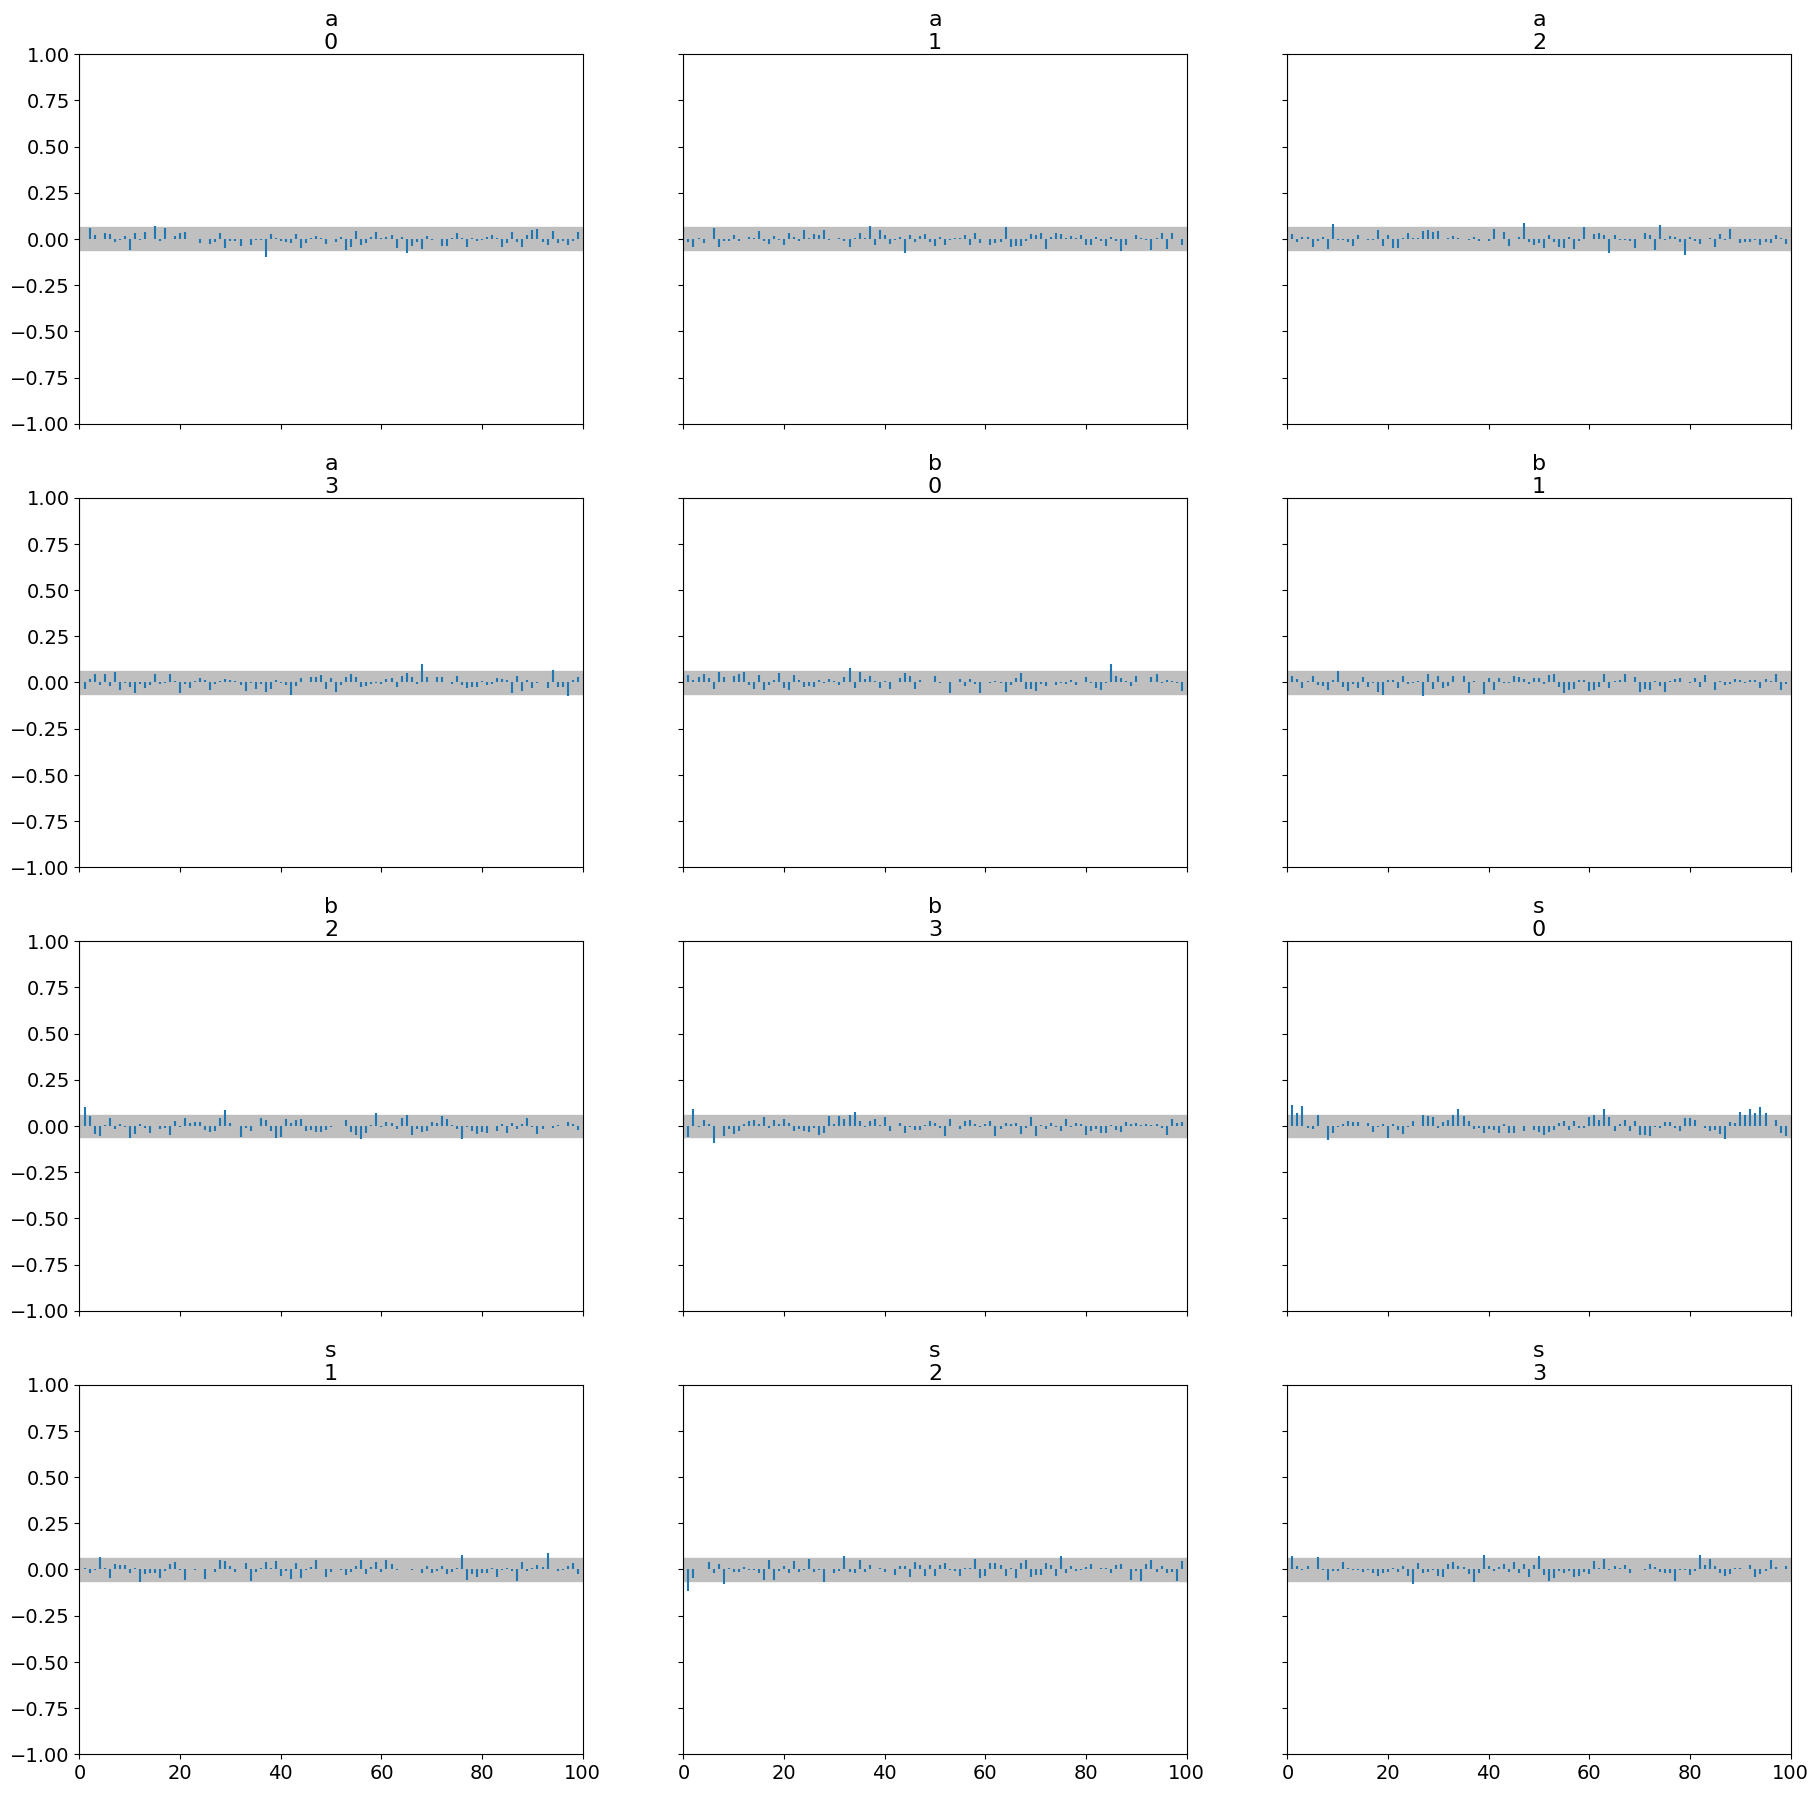

In [5]:
m.diag.autocor()

## Posterior distribution plots

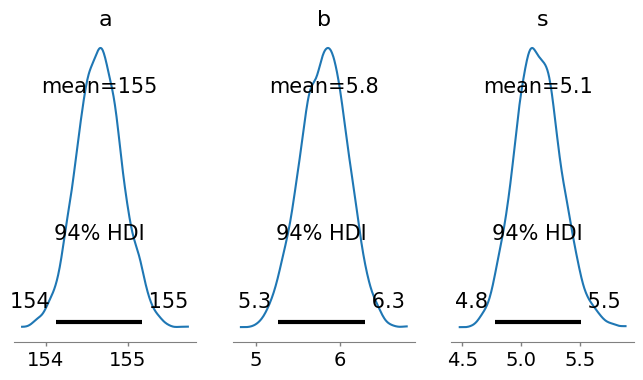

In [6]:
m.diag.posterior()

## Trace plots for MCMC chains

array([[<Axes: title={'center': 'a'}>,
        <Axes: title={'center': 'a'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'b'}>,
        <Axes: title={'center': 'b'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 's'}>,
        <Axes: title={'center': 's'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

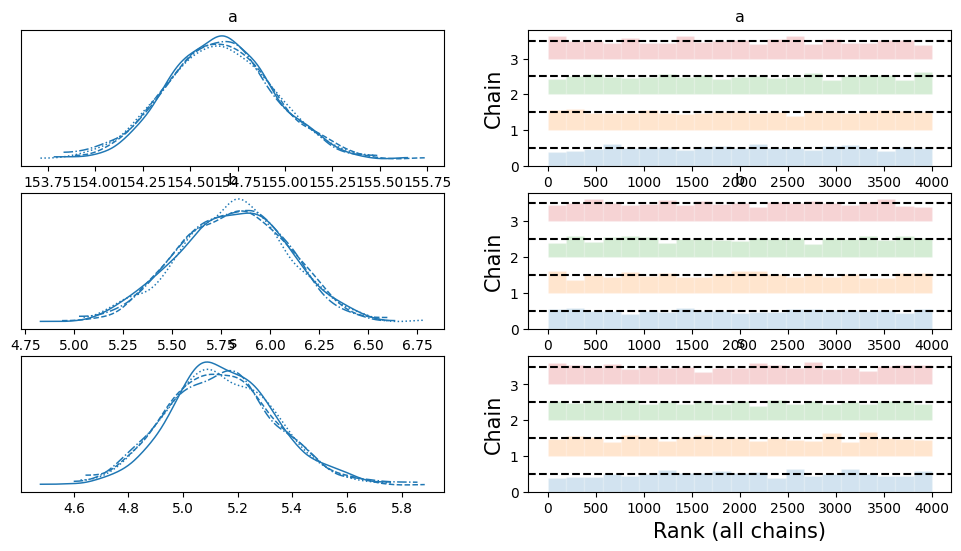

In [7]:
m.diag.plot_trace()

## Create rank plots for MCMC chains

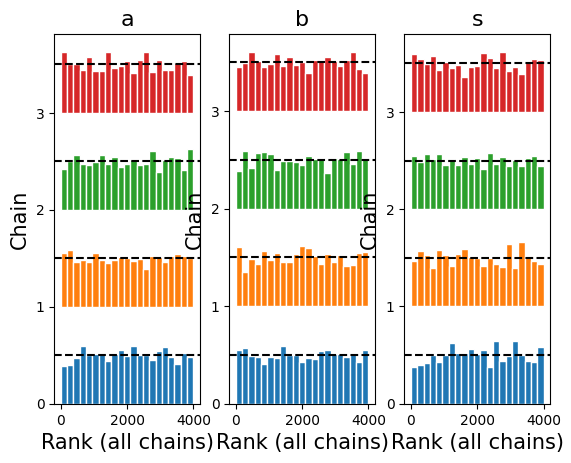

In [8]:
m.diag.rank()

## Forest plot of estimated values

array([<Axes: >, <Axes: title={'center': 'ess'}>], dtype=object)

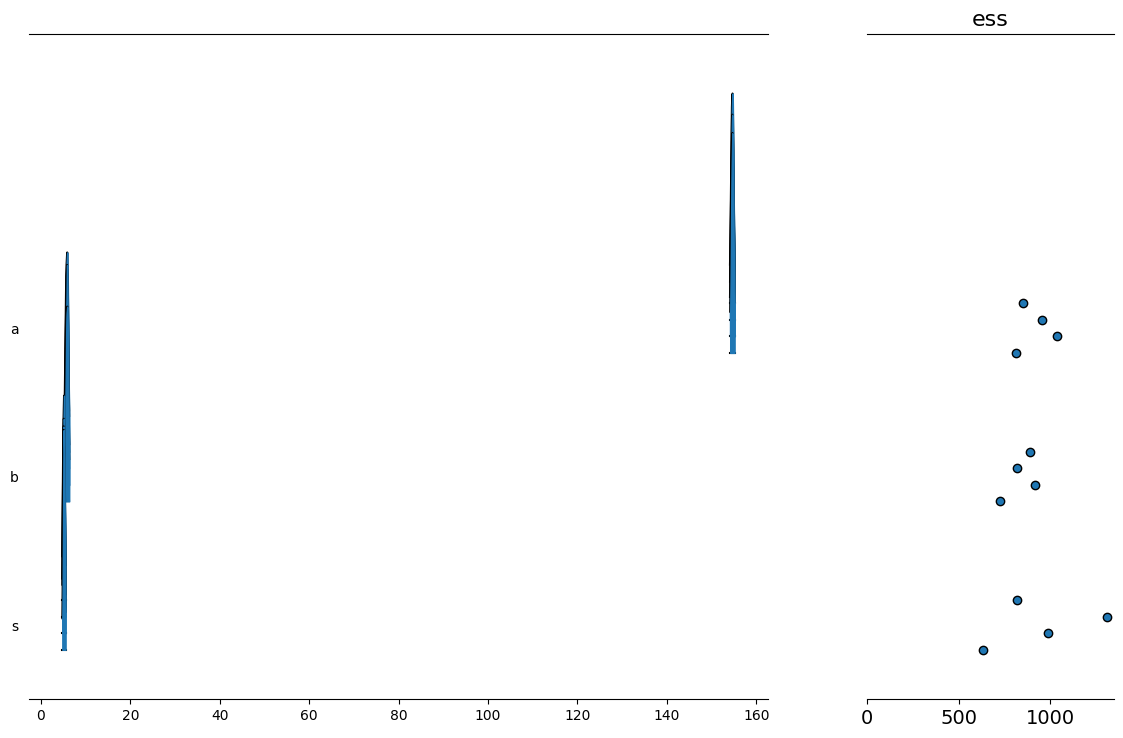

In [9]:
m.diag.forest()

## Pairwise plots of the posterior distribution

/home/sosa/.local/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  warnings.warn(


array([[<Axes: ylabel='a'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='b'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='a', ylabel='s'>, <Axes: xlabel='b'>,
        <Axes: xlabel='s'>]], dtype=object)

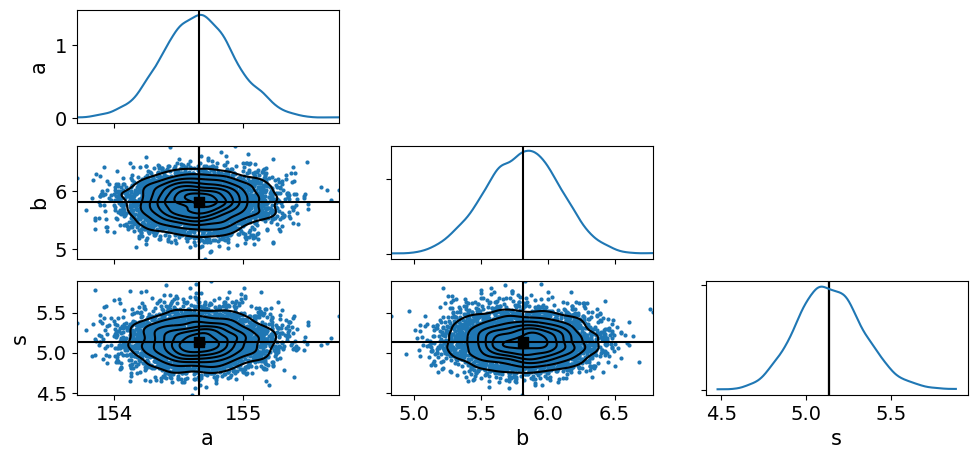

In [10]:
m.diag.pair()

## Density plots of the posterior distribution

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>,
        <Axes: title={'center': 's'}>]], dtype=object)

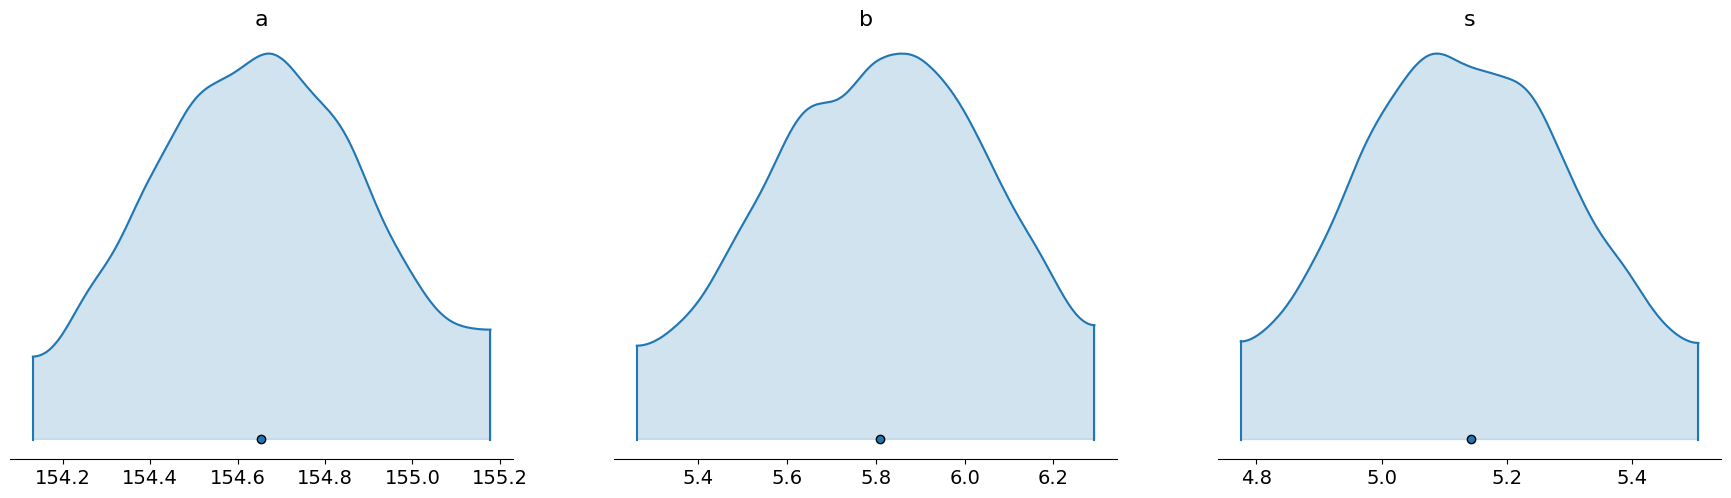

In [11]:
m.diag.density()

## Evolution of effective sample size across iterations

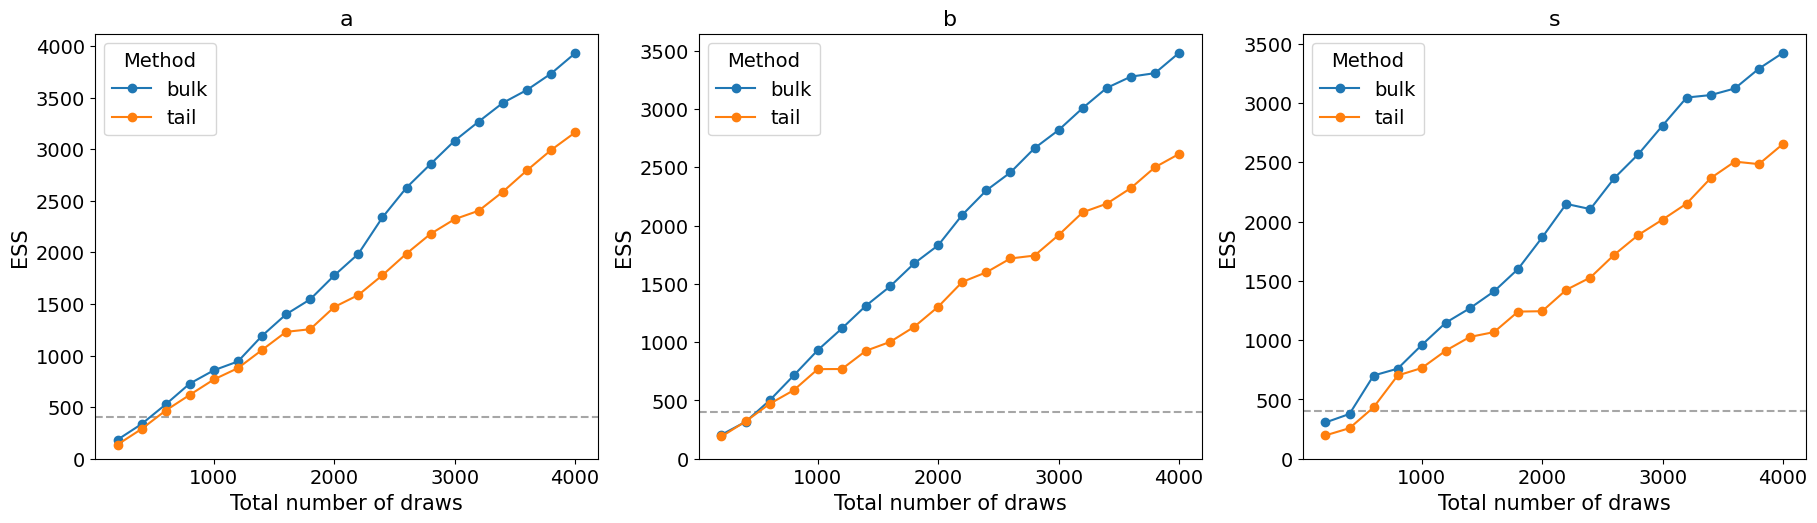

In [12]:
m.diag.plot_ess()